<a href="https://colab.research.google.com/github/BrunaKrasotaMatos/An-liseEstat-stica/blob/main/Trilha3/Trilha3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# caso não tenha, instale a biblioteca ggplot2
install.packages("ggplot2")
install.packages("ggpubr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘sp’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘lme4’, ‘Rcpp’, ‘corrplot’, ‘car’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’




In [2]:
# Pacotes
library(readr)
library(data.table)
library(dplyr)
library(ggplot2)
#library(ggpubr)

# Definir as classes
classes <- c("numeric","character","character","character","numeric","numeric","numeric","numeric","numeric","numeric")
data(diamonds)
diamantes <- diamonds

# Para fazer uma primeira análise
head(diamantes)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


In [3]:
# Inspecionando os dados
str(diamantes, strict.width = "wrap", give.attr = FALSE)

tibble [53,940 × 10] (S3: tbl_df/tbl/data.frame)
$ carat : num [1:53940] 0.23 0.21 0.23 0.29 0.31 0.24 0.24 0.26 0.22 0.23 ...
$ cut : Ord.factor w/ 5 levels "Fair"<"Good"<..: 5 4 2 4 2 3 3 3 1 3 ...
$ color : Ord.factor w/ 7 levels "D"<"E"<"F"<"G"<..: 2 2 2 6 7 7 6 5 2 5 ...
$ clarity: Ord.factor w/ 8 levels "I1"<"SI2"<"SI1"<..: 2 3 5 4 2 6 7 3 4 5 ...
$ depth : num [1:53940] 61.5 59.8 56.9 62.4 63.3 62.8 62.3 61.9 65.1 59.4 ...
$ table : num [1:53940] 55 61 65 58 58 57 57 55 61 61 ...
$ price : int [1:53940] 326 326 327 334 335 336 336 337 337 338 ...
$ x : num [1:53940] 3.95 3.89 4.05 4.2 4.34 3.94 3.95 4.07 3.87 4 ...
$ y : num [1:53940] 3.98 3.84 4.07 4.23 4.35 3.96 3.98 4.11 3.78 4.05 ...
$ z : num [1:53940] 2.43 2.31 2.31 2.63 2.75 2.48 2.47 2.53 2.49 2.39 ...


In [4]:
# Analisando os dados pelo summary
summary(diamantes)
#Analiso se os valores sao coerentes, se os min e max fazem sentido
# para as variaveis nao numéricas eu tenho a moda

     carat               cut        color        clarity          depth      
 Min.   :0.2000   Fair     : 1610   D: 6775   SI1    :13065   Min.   :43.00  
 1st Qu.:0.4000   Good     : 4906   E: 9797   VS2    :12258   1st Qu.:61.00  
 Median :0.7000   Very Good:12082   F: 9542   SI2    : 9194   Median :61.80  
 Mean   :0.7979   Premium  :13791   G:11292   VS1    : 8171   Mean   :61.75  
 3rd Qu.:1.0400   Ideal    :21551   H: 8304   VVS2   : 5066   3rd Qu.:62.50  
 Max.   :5.0100                     I: 5422   VVS1   : 3655   Max.   :79.00  
                                    J: 2808   (Other): 2531                  
     table           price             x                y         
 Min.   :43.00   Min.   :  326   Min.   : 0.000   Min.   : 0.000  
 1st Qu.:56.00   1st Qu.:  950   1st Qu.: 4.710   1st Qu.: 4.720  
 Median :57.00   Median : 2401   Median : 5.700   Median : 5.710  
 Mean   :57.46   Mean   : 3933   Mean   : 5.731   Mean   : 5.735  
 3rd Qu.:59.00   3rd Qu.: 5324   3rd Qu.:

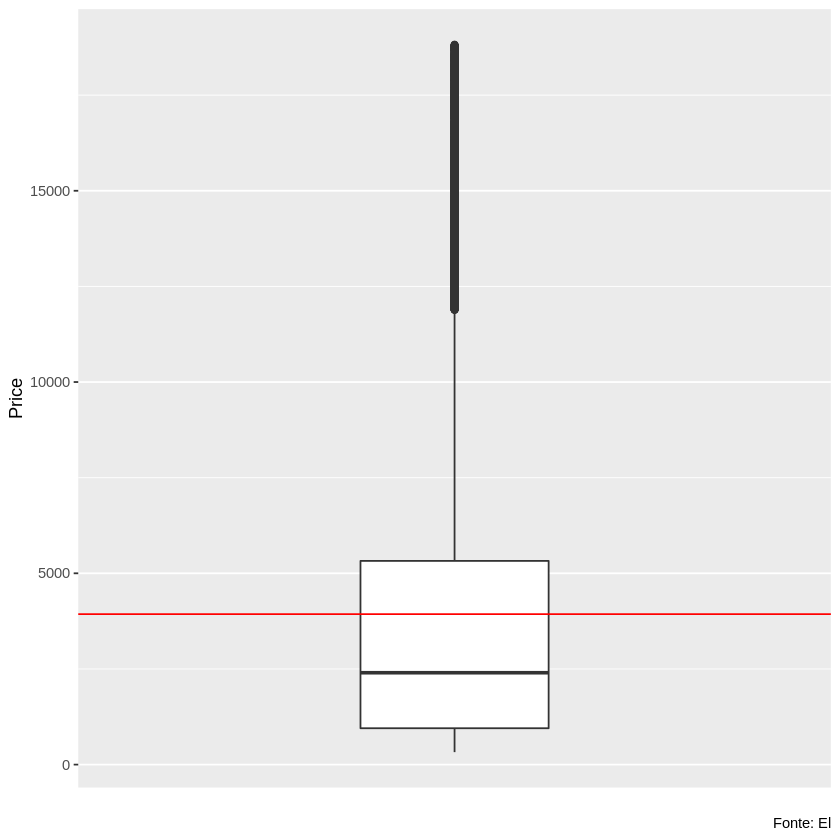

In [5]:
# Grafico box plot
ggplot(data=diamantes) +
  geom_boxplot(
    aes(x = "Price",
        y = price),width = 0.3, varwidth = F) +
    labs(y = "Price",
         x = "", caption = "Fonte: El") +
    geom_abline(slope=0, intercept=3933, color="red") +
    scale_x_discrete(labels = NULL, breaks = NULL)
    

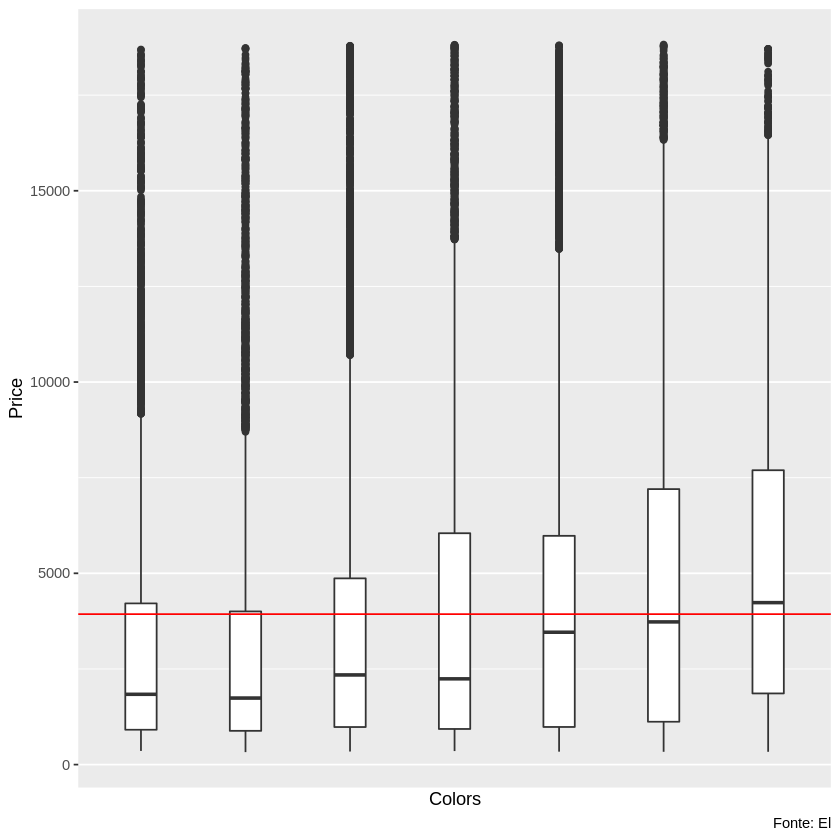

In [6]:
# Grafico box plot com regioes
ggplot(data=diamantes) +
  geom_boxplot(
    aes(x = color,
        y = price),width = 0.3, varwidth = F) +
    labs(y = "Price",
         x = "Colors", caption = "Fonte: El") +
    geom_abline(slope=0, intercept=3933, color="red") +
    scale_x_discrete(labels = NULL, breaks = NULL)

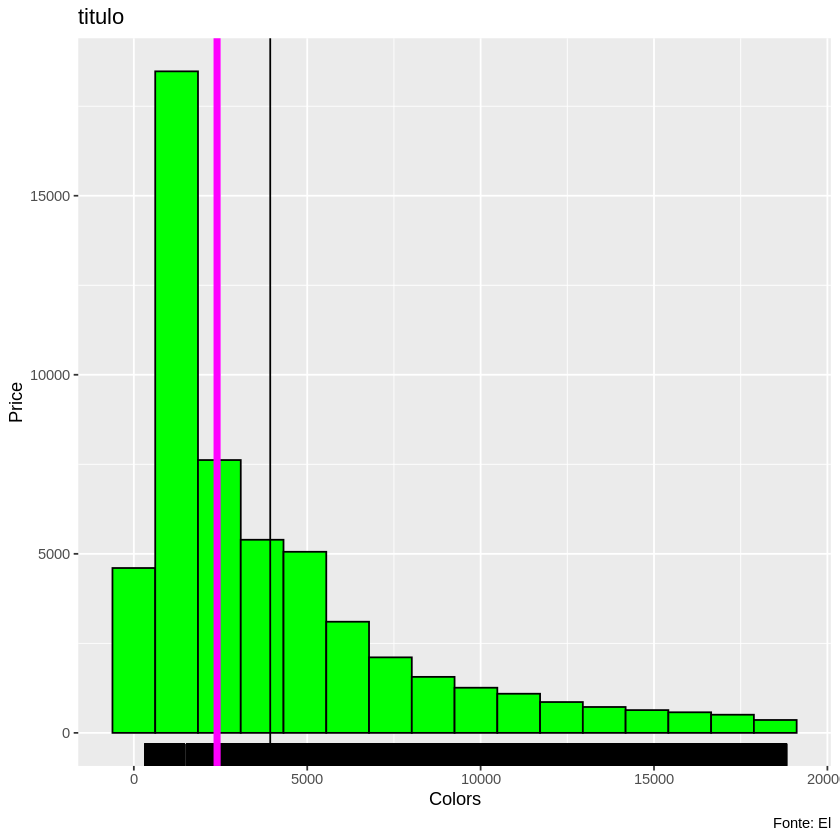

In [9]:
# Grafico histograma
ggplot(data=diamantes) +
  geom_histogram(
    aes(price),bins = 16, fill = "green", color = "black") +
    labs(title = "titulo", y = "Price",
         x = "Colors", caption = "Fonte: El") +
    geom_vline(xintercept = 3933) +
    geom_rug(aes(price)) +
    geom_vline(xintercept = median(diamantes$price), color = "magenta", lwd = 2) 

Warning message:
“Ignoring unknown parameters: varwidth”


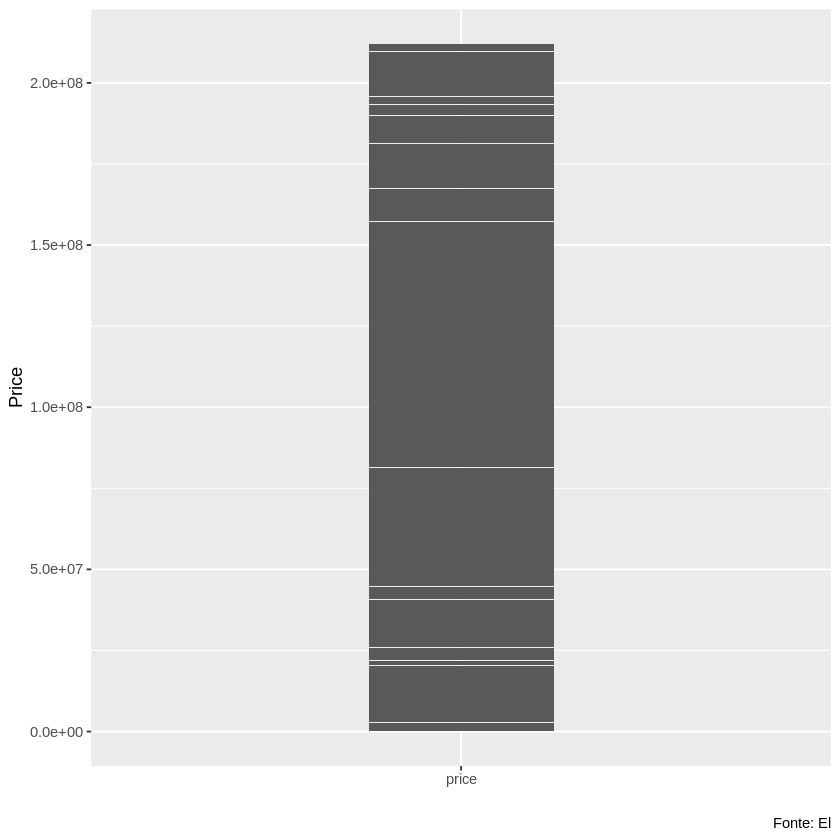

In [11]:
# Grafico de colunas
ggplot(data=diamantes) +
  geom_col(
    aes(x = "price",
        y = price),width = 0.3, varwidth = F) +
    labs(y = "Price",
         x = "", caption = "Fonte: El") 

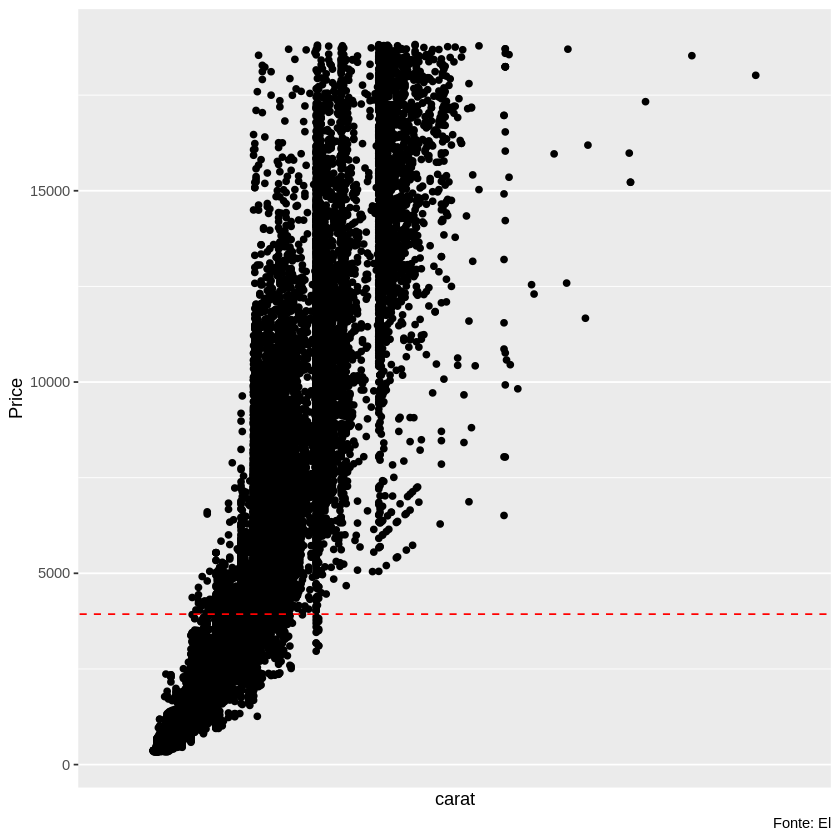

In [12]:
# Grafico de pontos
ggplot(data=diamantes) +
  geom_point(
    aes(x = carat, y = price)) +
    labs(y = "Price",
         x = "carat", caption = "Fonte: El") +
    geom_abline(slope=0, intercept=3933, linetype = 2, color="red") +
    scale_x_discrete(labels = NULL, breaks = NULL)

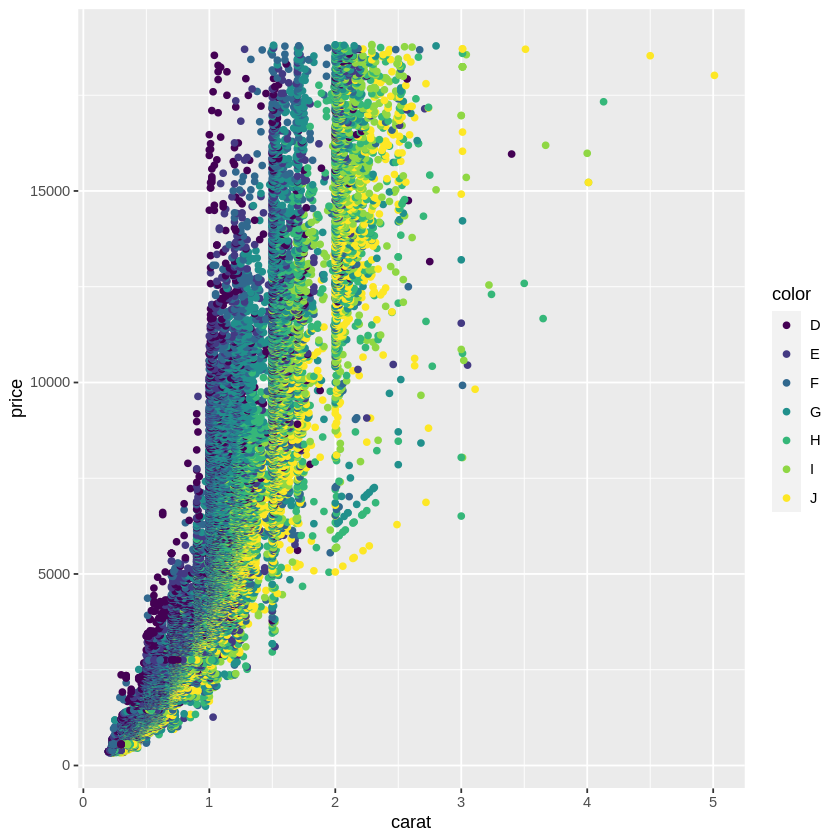

In [15]:
# Grafico colorido de pontos
ggplot(data=diamantes) +
  geom_point(
    aes(x = carat, y = price, color = color))